# Importing basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [2]:
data=pd.read_csv('train_ctrUa4k.csv')


In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA

In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
data['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [9]:
data['Dependents']=data['Dependents'].replace('3+','4')

In [10]:
data['Dependents'].unique()

array(['0', '1', '2', '4', nan], dtype=object)

In [11]:
data['Dependents']=data['Dependents'].astype('float')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


# Missing value handling

In [13]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
num_data=data[['Dependents','CoapplicantIncome','LoanAmount','ApplicantIncome','Loan_Amount_Term']]

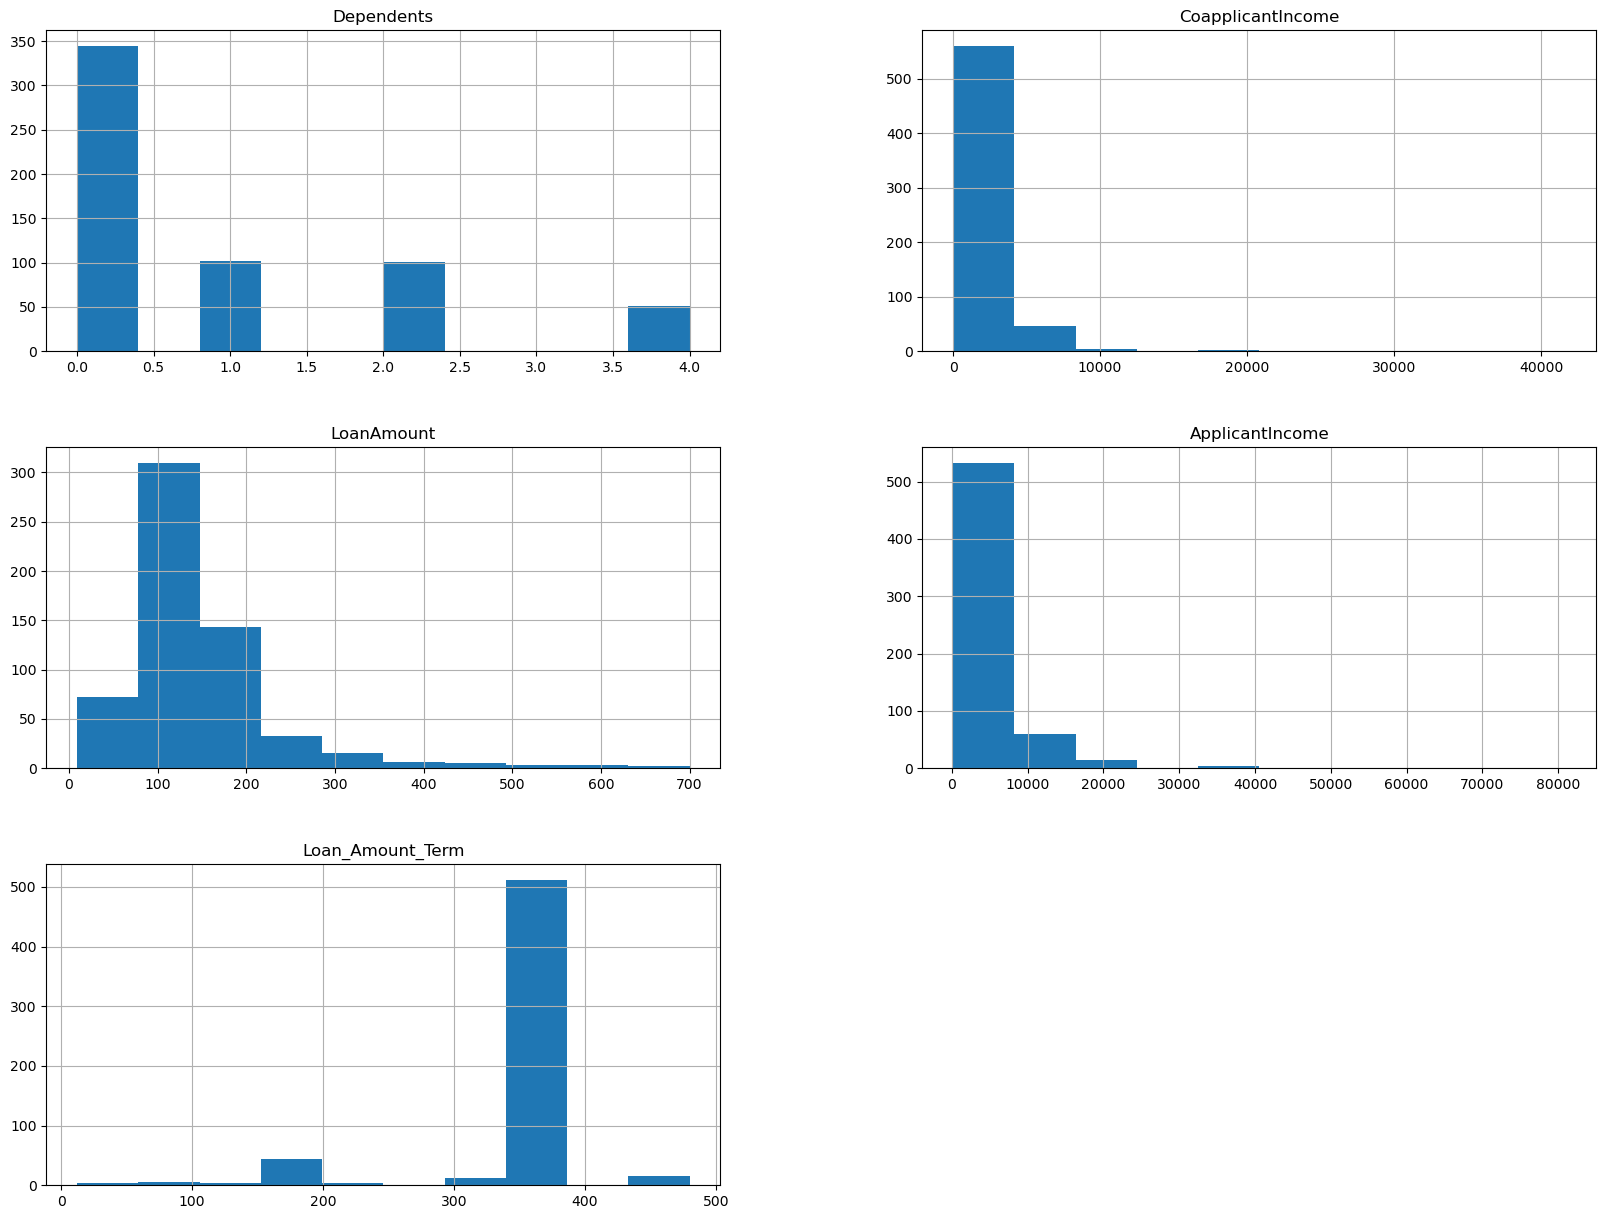

In [15]:
num_data.hist(figsize=(20,15))
plt.show()

In [16]:
for i in num_data:
    data[i].fillna(value=data[i].median(),inplace=True)

In [17]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
data.drop(['Loan_ID'],axis=1,inplace=True)

In [19]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
cata_data=data[['Gender','Married','Education','Self_Employed','Credit_History']]
cata_data

,Gender,Married,Education,Self_Employed,Credit_History
0,Male,No,Graduate,No,1.0
1,Male,Yes,Graduate,No,1.0
2,Male,Yes,Graduate,Yes,1.0
3,Male,Yes,Not Graduate,No,1.0
4,Male,No,Graduate,No,1.0
...,...,...,...,...,...
609,Female,No,Graduate,No,1.0
610,Male,Yes,Graduate,No,1.0
611,Male,Yes,Graduate,No,1.0
612,Male,Yes,Graduate,No,1.0


In [21]:
for i in cata_data:
    data[i].fillna(value=data[i].mode()[0],inplace=True)

In [22]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Married'] = le.fit_transform(data['Married'])
data['Education'] = le.fit_transform(data['Education'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Property_Area'] = le.fit_transform(data['Property_Area'])

In [24]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,2,Y
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,Y


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int32(5), int64(1), object(1)
memory usage: 45.7+ KB


# Dependent and independent variable

In [26]:
y=data['Loan_Status']
x=data.drop(['Loan_Status'],axis=1)

# Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
data[cols]=scaler.fit_transform(data[cols])

In [29]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,2,Y
1,1,1,1.0,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,N
2,1,1,0.0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,2,Y
3,1,1,0.0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,2,Y
4,1,0,0.0,0,0,0.097728,-0.554487,-0.056551,0.273231,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,-0.410130,-0.554487,-0.889500,0.273231,1.0,0,Y
610,1,1,4.0,0,0,-0.212557,-0.554487,-1.258378,-2.522836,1.0,0,Y
611,1,1,1.0,0,0,0.437174,-0.472404,1.276168,0.273231,1.0,2,Y
612,1,1,2.0,0,0,0.357064,-0.554487,0.490816,0.273231,1.0,2,Y


# Splitting the data into train test model and applying k-fold cross validation


In [32]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
model=clf.fit(x_train,y_train)
model=clf.fit(x_train,y_train)
y_pred=model.predict(x_test)

C:\Users\Anagha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anagha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
model=clf.fit(x_train,y_train)

C:\Users\Anagha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
from sklearn.model_selection import cross_val_score
c_v_score=cross_val_score(model,x,y,cv=kfold_validator)
c_v_score

C:\Users\Anagha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Anagha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

array([0.77419355, 0.83870968, 0.74193548, 0.77419355, 0.78688525,
       0.80327869, 0.85245902, 0.83606557, 0.80327869, 0.83606557])

In [38]:
np.mean(c_v_score)

0.8047065044949762

# Logistic regression

In [41]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
model=clf.fit(x_train,y_train)
model=clf.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [43]:
print('accuracy_score=',accuracy_score(y_test,y_pred))

accuracy_score= 0.7792207792207793


# knn


In [44]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

C:\Users\Anagha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Anagha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

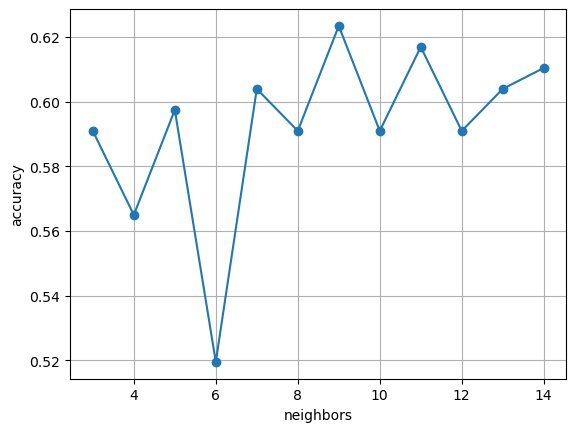

In [45]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('neighbors')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [47]:
classifier = KNeighborsClassifier(n_neighbors=11,metric='minkowski',p=2)
model = classifier.fit(x_train,y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred)
metric_k.append(acc)

C:\Users\Anagha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [48]:
print("accuracy=",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

accuracy= 0.6168831168831169
[[ 5 49]
 [10 90]]


SVM

In [51]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
model=svmclf.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy=",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

accuracy= 0.7532467532467533
[[ 16  38]
 [  0 100]]


decision tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
decclf=DecisionTreeClassifier(random_state=42)
model=decclf.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy=",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

accuracy= 0.6818181818181818
[[26 28]
 [21 79]]


random forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rndmclf=RandomForestClassifier(random_state=42)
model=rndmclf.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy=",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

accuracy= 0.7662337662337663
[[21 33]
 [ 3 97]]


In [54]:
rndmclf=RandomForestClassifier(n_estimators=80)
model=rndmclf.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("accuracy=",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

accuracy= 0.7727272727272727
[[22 32]
 [ 3 97]]


# model selection

since random forest and logistic have the best accuracy we choose random forest model for predicting the output

# Fine tuning

In [55]:
model = RandomForestClassifier(n_estimators=300, criterion='entropy',max_features='sqrt',min_samples_leaf=10,random_state=100).fit(x_train,y_train)

In [56]:
prediction2 = model.predict(x_test)

In [57]:
print(accuracy_score(y_test,prediction2))

0.7792207792207793


In [59]:
[int(x) for x in np.linspace(start=200, stop=2000, num=10)]

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [60]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10,1000,10)]
min_samples_split = [2,5,10,14]
min_samples_leaf = [1,2,4,6,8]
random_grid = {'n_estimators':n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}

In [61]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions = random_grid, n_iter=100, cv=3,verbose=2,random_state=100,n_jobs=-1)
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [62]:
rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 14,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'criterion': 'entropy'}

In [63]:
best_random_grid = rf_randomcv.best_estimator_
y_pred = best_random_grid.predict(x_test)
accuracy_score(y_test,y_pred)

0.7727272727272727

# calling the testing dataset


In [64]:
data1=pd.read_csv('test.csv')
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# EDA

In [65]:
data1.shape

(367, 12)

In [66]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [67]:
data1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [68]:
data1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [69]:
data1['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [70]:
data1['Dependents']=data1['Dependents'].replace('3+','4')

In [71]:
data1['Dependents'].unique()

array(['0', '1', '2', '4', nan], dtype=object)

In [72]:
data1['Dependents']=data1['Dependents'].astype('float')

In [73]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    float64
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 34.5+ KB


# Missing value handling

In [74]:
data1.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [75]:
num_data=data1[['Dependents','CoapplicantIncome','LoanAmount','ApplicantIncome','Loan_Amount_Term']]

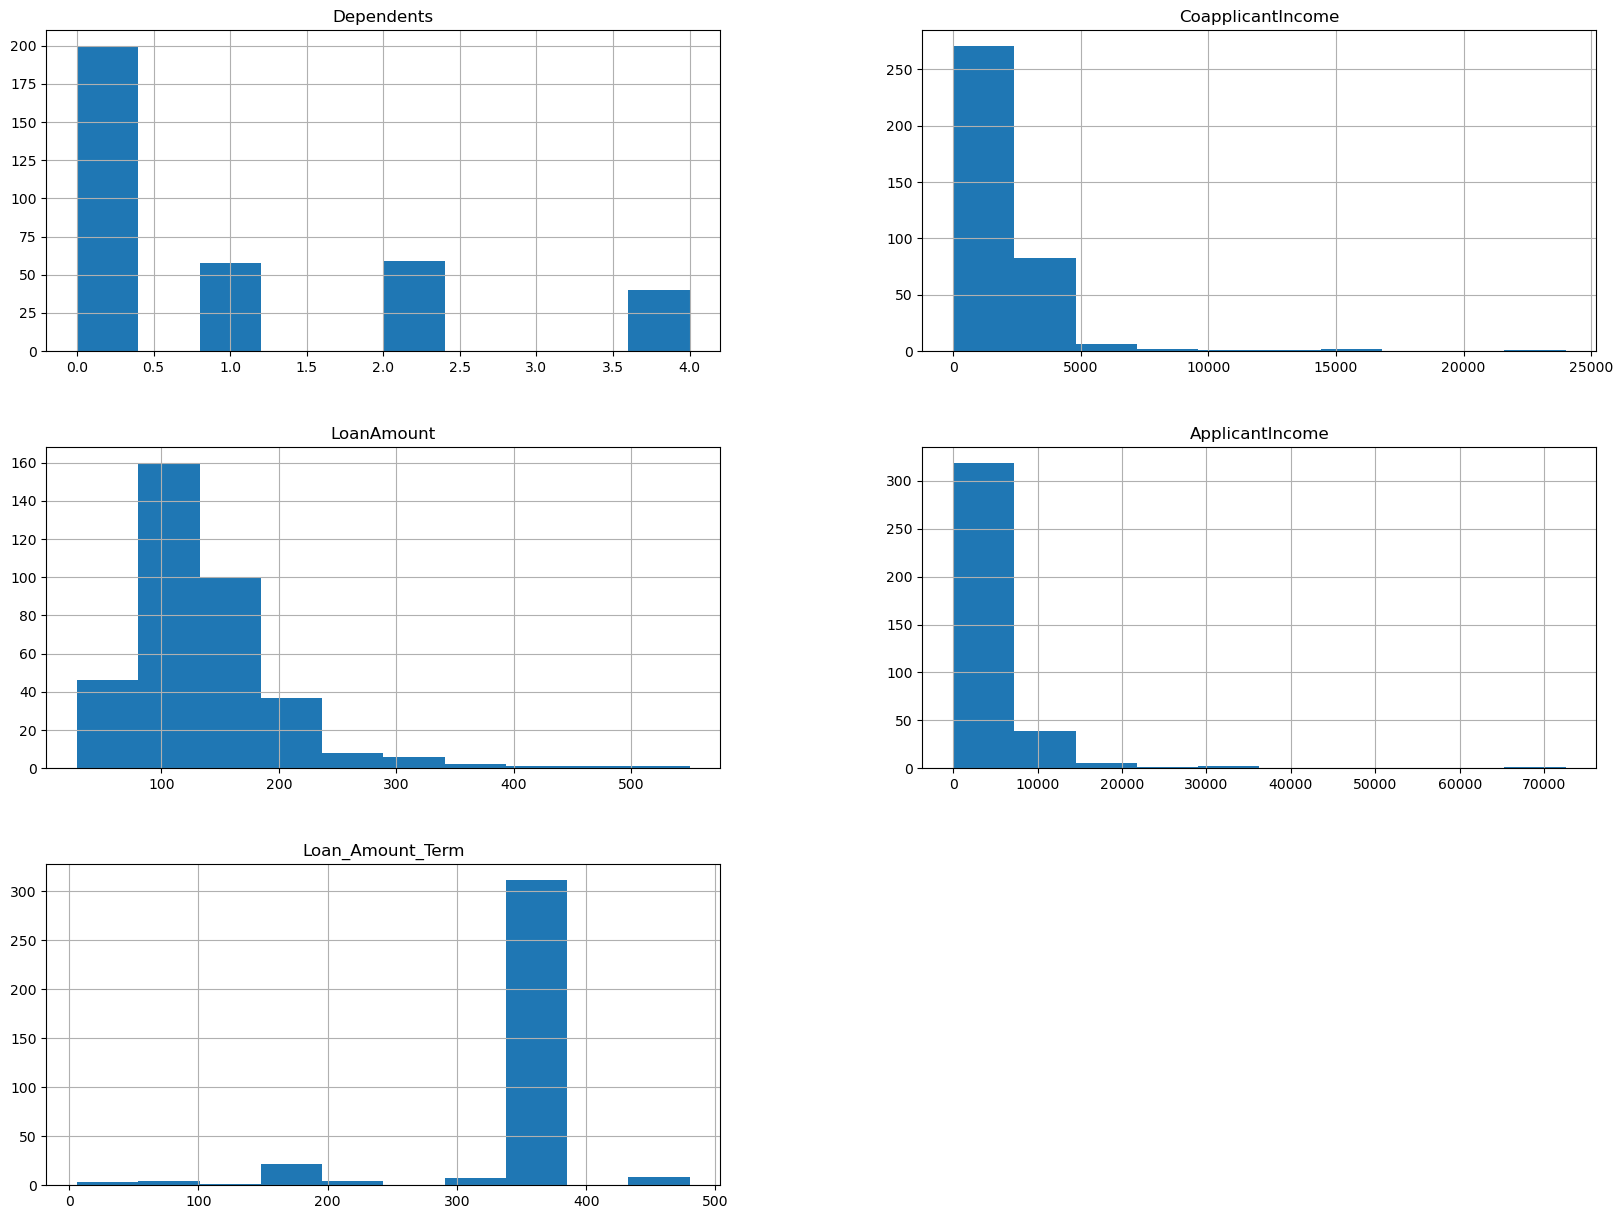

In [76]:
num_data.hist(figsize=(20,15))
plt.show()

In [77]:
for i in num_data:
    data1[i].fillna(value=data1[i].median(),inplace=True)

In [78]:
data1.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64

In [79]:
data1.drop(['Loan_ID'],axis=1,inplace=True)

In [80]:
cata_data=data1[['Gender','Married','Education','Self_Employed','Credit_History']]
cata_data

,Gender,Married,Education,Self_Employed,Credit_History
0,Male,Yes,Graduate,No,1.0
1,Male,Yes,Graduate,No,1.0
2,Male,Yes,Graduate,No,1.0
3,Male,Yes,Graduate,No,NaN
4,Male,No,Not Graduate,No,1.0
...,...,...,...,...,...
362,Male,Yes,Not Graduate,Yes,1.0
363,Male,Yes,Graduate,No,1.0
364,Male,No,Graduate,No,NaN
365,Male,Yes,Graduate,No,1.0


In [81]:
for i in cata_data:
    data1[i].fillna(value=data1[i].mode()[0],inplace=True)

In [82]:
data1.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

# Encoding

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data1['Gender'] = le.fit_transform(data1['Gender'])
data1['Married'] = le.fit_transform(data1['Married'])
data1['Education'] = le.fit_transform(data1['Education'])
data1['Self_Employed'] = le.fit_transform(data1['Self_Employed'])
data1['Property_Area'] = le.fit_transform(data1['Property_Area'])

In [84]:
data1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0.0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1.0,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2.0,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2.0,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0.0,1,0,3276,0,78.0,360.0,1.0,2


In [85]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    int32  
 1   Married            367 non-null    int32  
 2   Dependents         367 non-null    float64
 3   Education          367 non-null    int32  
 4   Self_Employed      367 non-null    int32  
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int32  
dtypes: float64(4), int32(5), int64(2)
memory usage: 24.5 KB


# Feature scaling

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
data1[cols]=scaler.fit_transform(data1[cols])

In [87]:
data1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0.0,0,0,0.186461,-0.673335,-0.426780,0.266022,1.0,2
1,1,1,1.0,0,0,-0.352692,-0.029848,-0.163953,0.266022,1.0,2
2,1,1,2.0,0,0,0.039641,0.098849,1.183033,0.266022,1.0,2
3,1,1,2.0,0,0,-0.502774,0.418877,-0.591047,0.266022,1.0,2
4,1,0,0.0,1,0,-0.311909,-0.673335,-0.952433,0.266022,1.0,2


In [88]:
y_pred=best_random_grid.predict(data1)

In [89]:
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [90]:
for name in y_pred:
    print(name)

Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
N
Y
Y
Y
Y
N
Y
Y
N
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
N
N
Y
Y
Y
N
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
N
N
Y
N
Y
Y
Y
Y
N
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
N
Y
Y
N
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
N
Y
Y
Y
Y
N
Y
N
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
N
Y
Y
Y
Y
N
N
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
N
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
Y
